CPSC 302 <br>
**Assignment #1** <br>
Brandon Loss <br>
41977142 <br>

#Exercise 1(a)

Let $A_1$ be the given approximation $\frac{f(x_0+h)-f(x_0-h)}{2h}$ <br>
Let $A_2$ be the approximation $\frac{f(x_0+h)-f(x_0)}{h}$ (from Example 1.2 in the text).

<br>
By inspection, we surmise that if $A_2$ is the slope of the chord from $f(x_0)$ to $f(x_0+h)$, then $A_1$ must be the slope of the chord from $f(x_0-h)$ to $f(x_0+h)$.  Accordingly, let $A_3$ be the slope of the chord from $f(x_0-h)$ to $f(x_0)$ such that $A_3 = \frac{f(x_0)-f(x_0-h)}{h}$

<br>
Let $T_2$ be the Taylor series $f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0) + \frac{h^3}{6}f'''(x_0) + ... $ <br>
Let $T_3$ be the Taylor series $f(x_0-h) = f(x_0) - hf'(x_0) + \frac{h^2}{2}f''(x_0) - \frac{h^3}{6}f'''(x_0) + ... $

<br>
We can solve $T_3$ for $A_3$, just as $T_2$ was used to find $A_2$ in the text:
$$
\begin{align}
f(x_0-h) &= f(x_0) - hf'(x_0) + \frac{h^2}{2}f''(x_0) - \frac{h^3}{6}f'''(x_0) + ... \\
 f'(x_0) &= \frac{f(x_0) - f(x_0-h)}{h} + [\frac{h}{2}f''(x_0) - \frac{h^2}{6}f'''(x_0) + ...] \\  
         &=  A_3  \pm [ error ] \\
\end{align}
$$

<br>
Similarly, we can use $T_1 = T_2 - T_3$ to find $A_3$ by subtracting the equation for $T_3$ from the equation for $T_2$:
$$
\begin{align}
           f(x_0+h) &= T_2 = f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(x_0) + \frac{h^3}{6}f'''(x_0) + ... \\ 
           f(x_0-h) &= T_3 = f(x_0) - hf'(x_0) + \frac{h^2}{2}f''(x_0) - \frac{h^3}{6}f'''(x_0) + ... \\
f(x_0+h) - f(x_0-h) &= T_1 = (0) + 2hf'(x_0) + (0) + 2\frac{h^3}{6}f'''(x_0) + ... \\
\end{align}
$$

<br>
Now solve $T_1$ for $f'(x_0)$
$$
\begin{align}
f(x_0+h) - f(x_0-h) &= 2hf'(x_0) + 2\frac{h^3}{6}f'''(x_0) + ... \\
        (2h)f'(x_0) &= f(x_0+h) - f(x_0-h) - (2h)\frac{h^2}{6}f'''(x_0) + ... \\
            f'(x_0) &= \frac{f(x_0+h) - f(x_0-h)}{2h} - [\frac{h^2}{6}f'''(x_0) + ... ]\\
                    &= A_1 \pm [error] \\
\end{align}
$$

<br>
So if we know $f''(x_0)$, and it is nonzero, then for small $h$ we can estimate the discretization error:
$$|f'(x_0) - \frac{f(x_0+h) - f(x_0-h)}{2h}| \approx \frac{h^2}{6}|f'''(x_0)| $$

<br><br><br>


# Exercise 1(b)

The text provides a MATLAB script for approximating $f(x_0)=sin(1.2)$ with $A_2$:
```
    x0 = 1.2;
    f0 = sin(x0);
    fp = cos(x0);
    i = -20:0.5:0;
    h = 10.^i;
    err = abs (fp - (sin(x0+h) - f0)./h );
    d_err = f0/2*h;
    loglog (h,err,'-*');
    hold on
    loglog (h,d_err,'r-.');
    xlabel('h')
    ylabel('Absolute error')
```

<br>
For this script to instead use $A_1$, `err` and `d_err` would need to be changed to the following:
```
    err = abs (fp - (sin(x0+h) - sin(x0-h)) ./ (2*h) );
    d_err = (h.^2 / 6) * abs (fp);
```

<br>
Note that $|f'''(x)|=|cos(x)|=|f'(x)|$ and so `abs(fp)` is acceptable for minimum refactoring.  But for the sake of clarity, it might be preferable to use `abs(-fp)` or to define the variable `fppp` as in the following:
```
    x0 = 1.2;
    f0 = sin(x0);
    fp = cos(x0);
    fppp = -cos(x0);                               %% definition of f'''(x)
    i = -20:0.5:0;
    h = 10.^i;
    err = abs(fp -(sin(x0+h) -sin(x0-h))./(2*h));  %% approximation error (discretization and roundoff)
    d_err = (h.^2/6) * abs(fppp);                  %% discretization error (without roundoff error)
    loglog (h,err,'-*');
    hold on
    loglog (h,d_err,'r-.');
    xlabel('h')
    ylabel('Absolute error')
```

<br>
To observe the similarities and differences in comparison to Figure 1.3 in the text, consider the following:

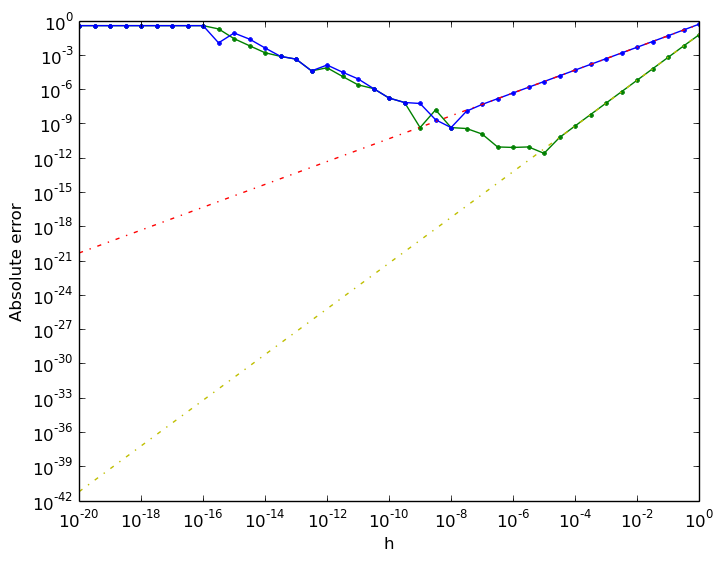

In [1]:
using PyPlot

x0 = 1.2;
f0 = sin(x0);
fp = cos(x0);
i = -20:0.5:0;
h = 10.^i;

err = abs(fp -(sin(x0+h) -sin(x0-h))./(2*h));  # A1
d_err = (h.^2/6) * abs(fp);                     
loglog(h, err, "g", marker=".");               # approximation error (discretization and roundoff)
loglog(h, d_err, "y-.");                       # discretization error (without roundoff error)

err = abs(fp - (sin(x0+h) - f0)./h );          # A2
d_err = f0/2*h;
loglog(h, err, marker=".");                    # approximation error (discretization and roundoff)
loglog(h, d_err, "r-.");                       # discretization error (without roundoff error)

xlabel("h");
ylabel("Absolute error");


As expected, the discretization error for $A_1$ (in yellow) decreases like $h^2$ as $h$ is decreased, while the discretization error for $A_2$ (in red) decreases like $h$.  Because of this, $A_1$ bottoms out sooner and lower than $A_2$.

<br>
Note that the approximation error for $A_1$ (in green) and $A_2$ (in blue) are roughly equal past the point where roundoff begins to dominate.  The primary difference is that $A_1$ is dominated for $h<10^{-8}$ whereas $A_2$ is dominated for $h<10^{-5}$.

<br><br><br>

# Exercise 2(a)

Given that $u_n = \int_0^1 \!\frac{x^n}{x+0.5} \,\mathrm{d}x$, then we can risk an abuse of notation and imagine that $u_{n-1} = \int_0^1 \!\frac{x^{n-1}}{x+0.5} \,\mathrm{d}x$ for the purposes of finding feasible values for the scalars $a$ and $b$.
$$
\begin{align}
u_n &= a*u_{n-1} + b \\
  b &= u_n - a*u_{n-1} \\
    &= \int_0^1\!\frac{x^n}{x+0.5}\,\mathrm{d}x - a\int_0^1\!\frac{x^{n-1}}{x+0.5}\,\mathrm{d}x \\
    &= \int_0^1\!\frac{(x-a)(x^{n-1})}{x+0.5}\,\mathrm{d}x \\
\end{align}
$$

<br>
From here, it would be convenient to let $a=-0.5$ so that we can cancel $x$ out of the denominator:
$$
\begin{align}
b &= \int_0^1\!\frac{(x-(-0.5))(x^{n-1})}{x+0.5}\,\mathrm{d}x \\
  &= \int_0^1\!x^{n-1}\,\mathrm{d}x \\
  &= \frac{x^n}{n}\bigg|_0^1 \\
  &= \frac{1^n}{n} - \frac{0^n}{n} = \frac{1}{n}
\end{align}
$$

<br>
So by using the scalars $a=-0.5$ and $b=1/n$, we can express $u_n$ in terms of $u_{n=1}$ without any discretization error (for any positive $n\in\mathbb{Z}$):
$$u_n = \frac{1}{n} - \frac{u_{n-1}}{2}$$

<br><br><br>

#Exercise 2(b)

Following from above, if $u_n = \int_0^1 \!\frac{x^n}{x+0.5} \,\mathrm{d}x$, then we have:
$$u_0 = \int_0^1 \!\frac{x^0}{x+0.5} \,\mathrm{d}x = log(x+0.5)\bigg|_0^1 = log(1.5)-log(0.5)$$

<br>
So our algorithm is simply:
$$
u_n = \begin{cases} 
             log(1.5)-log(0.5)  & n=0 \\
             1/n - (0.5)u_{n-1} & n>0 
      \end{cases}
$$

<br>
Note that the magnitude of roundoff errors is multiplied by $|-0.5|$ at each iteration of this algorithm.  Therefore, even though the relative error at the $n$th iteration has the exponential growth $E_n \simeq c_1^nE_0$, we have that $c_1=|-0.5|<1$ and thus the algorithm is stable.

<br><br><br>

#Exercise 2(c)

The following MATLAB code will display the values $u_1, u_2, ..., u_50$ along with differences $u_n - u_{n-1}$.  Additionally, it will display a warning if the algorithm becomes unstable; that is, if $u_n > u_{n-1}$ for some $n$.
```
for n = 0:50
  if (n == 0)
    u_0 = log(1.5) - log(0.5);      % initial value
    u_i = u_0;                      % initialize iterant
    end
  if (n > 0)
    u_n = 1/n - 0.5*u_i;            % approximation algorithm
    dif = u_n - u_i;                % iterative difference
    msg = ["u(", sprintf('%2.0f',n), ")=", sprintf('% 9.8f',u_n), "    ", ...
           "u(", sprintf('%2.0f',n), ")-u(", sprintf('%2.0f',n), ")= ", ...
           sprintf('% 7.6f',dif)];
    if (dif > 0)
      fprintf([msg, "  [UNSTABLE] \n"])
      fprintf("\n Algorithm is unstable!!! \n\n\n")
      break
    else
      fprintf([msg, "  [STABLE] \n"])
    end 
    u_i = u_n;                      % update iterant
  end
end
```

<br>
This program is perhaps a little inelegant, as it was intended to follow the algorithm from a mathematical perspective.  For something a bit more brisk, consider the following:

In [2]:
next = log(1.5)-log(0.5)
@printf("%2i  %15.5e  %15.5e \n",0,next,0)
for n = 1:50
    curr = next;
    next = 1/n - (0.5)curr
    diff = next - curr
    if (diff > 0)
        @printf("\n Algorithm is unstable!!! \n\n\n")
        break
    else
        @printf("%2i  %15.5e  %15.5e \n",n,next,diff)
    end   
end

 0      1.09861e+00      0.00000e+00 
 1      4.50694e-01     -6.47918e-01 
 2      2.74653e-01     -1.76041e-01 
 3      1.96007e-01     -7.86463e-02 
 4      1.51997e-01     -4.40102e-02 
 5      1.24002e-01     -2.79949e-02 
 6      1.04666e-01     -1.93359e-02 
 7      9.05242e-02     -1.41416e-02 
 8      7.97379e-02     -1.07864e-02 
 9      7.12422e-02     -8.49571e-03 
10      6.43789e-02     -6.86325e-03 
11      5.87196e-02     -5.65928e-03 
12      5.39735e-02     -4.74612e-03 
13      4.99363e-02     -4.03720e-03 
14      4.64604e-02     -3.47591e-03 
15      4.34365e-02     -3.02395e-03 
16      4.07818e-02     -2.65469e-03 
17      3.84326e-02     -2.34913e-03 
18      3.63392e-02     -2.09341e-03 
19      3.44620e-02     -1.87727e-03 
20      3.27690e-02     -1.69294e-03 
21      3.12345e-02     -1.53448e-03 
22      2.98373e-02     -1.39726e-03 
23      2.85596e-02     -1.27765e-03 
24      2.73869e-02     -1.17277e-03 
25      2.63066e-02     -1.08028e-03 
26      2.53

As $n$ increases (first column), $u_n$ decreases (second column) and the difference $u_n - u_{n-1}$ is always less than zero.  From this, we can assume that the algorithm will remain stable.